# Rubber Price Prediction Project 

Table of Contents

## Part 1: Problem Statement

1. What is your problem statement? What will you actually be doing?
    - Predict ribbed smoked sheet price for estimate trend for 1 month for make maximum profit of that month.
2. Who is your audience? Why will they care?
    - rubber cooperative facing the problem with don't get maximum profit or worse loss money from rubber price fluctuation.
3. What is your success metric? How will you know if you are actually solving the problem in a useful way?
    - Better than use average ribbed smoked sheet price of previous month. use RMSE as metrics. 
4. What is your data source? What format is your data in? How much cleaning and munging will be required?
    - Data sources from raot.com for historical rubber prices and investing.com for futures price such as tocom, sicom, etc. and currency price.
    - Format of data are csv.
    - Cleaning parts are joining data with date from main dataset and clean missing vlaue.
5. What are potential challenges or obstacles and how will you mitigate them?
    - develop a good time series model because it hard to do it well and also how to approach to audience.
6. Is this a reasonable project given the time constraints that you have?
    - yes because this project isn't complex much. Now I have all data.
    
    
![workflow](../image/workflow.jpg)

### Problem Statements

**Goals for Decision Maker**<br>
Rubber cooperative want a model that predict **Ribbed smoked sheet** prices for estimate trend next 1 month for increase chance of success speculate in Ribbed smoked sheet. 

**Goals for Develop Model**<br>
Build model to predict **Ribbed smoked sheet** prices next 1 month to estimate trend of RSS prices for Rubber cooperative. Model performance will evaluate by `MAPE`. <br>
*Model will work in production part if performance better than baseline 5%.

### Background Information

When talking about the largest Rubber market in Thailand, 95% of Thai people would have to say that it is in the South of Thailand.

Data in year 2000 from the National Statistical Office of Thailand had shown number of totaled households in southern region is 2,900,000 and there are 1,000,000 households that have rubber plantation 
Now everyone that own rubber plantation are facing The Rubber price fluctuation which from various events in the world such as 
1. Declining demands medical gloves decreasing from unfolding in coronavirus situation
2. Semiconductor chips are in shortage and affect the vehicle industry dramatically curtailing production [source](https://www.thansettakij.com/economy/trade/538589)

Almost all rubber plantation owners sold their product to Rubber cooperatives.
Rubber cooperatives are also suffering from wrong decision in sold products lower price than it should to be and made them lost because from the Rubber prices fluctuation it make difficult to speculate.

**Wrong decision** came from chief person which they usually use instinct for making decision and when they wrong many time it make cooperative lack profit and chain to members of cooperative that they will lost dividends and also chain to rubber plantation owners that they will sold products in low price because cooperatives need to cut the purchase price to support themselves.

Rubber cooperative want to change their instinct-decision to data driven-decision and their first step is hiring junior data scientist to develop a model to predict rubber price for next 1 month to estimate the future trend to increase success rate of speculation.

### Dataset

Rubber Dataset<br>
Data dictionary

variables|definition|
--|--|
cup_lump| Cup Lump Price|
rubber_sheet| Rubber Sheet Price|
ribbed_smoked_sheet| Ribbed Smoked Sheet Price|
latex| Latex Price|
fob| Free on Board Rubber Price|
tocom| Japan RSS3 Future Price|
sicom| Singapore RSS3 Future Price|
jpy| 1 Bath convert to Yen|
sgd| 1 Singapore dollar convert to Baht|
usd| 1 Bath convert to USD|
crude_oil| Crude oil Future Price|

From 
   1. [Rubber Prices 2560-2565](http://www.raot.co.th/ewt_news.php?nid=5662&filename=index)
   2. [FOB](http://www.raot.co.th/rubber2012/menu5.php)
   3. [Other Prices](https://www.investing.com/) 
   


## Part 2: Data Preparation

In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import kaleido

# Set chart style to ggplot
import matplotlib
matplotlib.style.use('ggplot')

from scipy import stats


from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import DecomposeResult, seasonal_decompose

# set float number to only 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format

### Import dataset
All data need to set date column as index for easily to analysis.

In [2]:
# create function for import data and set date type to datetime and set as index
# and set end date in october
def import_csv_dateindex(csv_file):
    """
    take path of csv file and return df which date col as index
    """
    df = pd.read_csv(f'../data/{csv_file}')
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    return df

#### Rubber types

In [3]:
# import rubber_price dataset and set date as index
rubber_price = import_csv_dateindex('rubber_price.csv')
rubber_price.head()

,latex,cup_lump,rubber_sheet,ribbed_smoked_sheet
date,,,,
2017-09-19,NaN,NaN,52.56,55.04
2017-09-20,NaN,NaN,51.51,53.28
2017-09-21,NaN,NaN,51.51,53.14
2017-09-22,NaN,NaN,51.78,53.30
2017-09-25,NaN,NaN,50.58,53.22


In [4]:
# check types of all columns
# all columns store in correct type which is float
rubber_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2017-09-19 to 2022-10-31
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latex                809 non-null    float64
 1   cup_lump             1052 non-null   float64
 2   rubber_sheet         1240 non-null   float64
 3   ribbed_smoked_sheet  1240 non-null   float64
dtypes: float64(4)
memory usage: 48.4 KB


In [5]:
# count value in rubber_price df
rubber_price.resample('y').count()

,latex,cup_lump,rubber_sheet,ribbed_smoked_sheet
date,,,,
2017-12-31,0,0,69,69
2018-12-31,0,123,242,242
2019-12-31,120,239,239,239
2020-12-31,243,244,244,244
2021-12-31,246,246,246,246
2022-12-31,200,200,200,200


**Latex** is empty in year 2017 and 2018 and have half in 2019. 

**Cup Lump** is empty in year 2017 and have half in year 2018. 

#### FOB

In [6]:
# import fob dataset and set date as index
fob = import_csv_dateindex('FOB.csv')
fob.head()

,rubber_sheet,latex,bid_rubber_sheet,bid_rss,bid_latex,fob
date,,,,,,
2001-01-03,22.30,20.00,23.55,24.26,NaN,26.70
2001-01-04,22.30,19.50,23.25,24.30,NaN,26.25
2001-01-05,22.30,19.25,23.26,24.16,NaN,26.25
2001-01-08,22.30,19.25,23.45,24.20,NaN,25.85
2001-01-09,22.20,19.25,23.26,24.26,NaN,25.90


In [7]:
# check types of all columns
# all columns store in correct type which is float
fob.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5260 entries, 2001-01-03 to 2022-10-31
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rubber_sheet      5245 non-null   float64
 1   latex             5246 non-null   float64
 2   bid_rubber_sheet  5019 non-null   float64
 3   bid_rss           5221 non-null   float64
 4   bid_latex         1843 non-null   float64
 5   fob               5250 non-null   float64
dtypes: float64(6)
memory usage: 287.7 KB


In [8]:
# count value in fob df
fob.resample('y').count()

,rubber_sheet,latex,bid_rubber_sheet,bid_rss,bid_latex,fob
date,,,,,,
2001-12-31,244,244,244,243,0,242
2002-12-31,245,245,246,246,0,246
2003-12-31,244,244,244,244,0,243
2004-12-31,241,241,241,241,146,241
2005-12-31,234,234,234,234,234,234
2006-12-31,237,237,235,236,235,237
2007-12-31,241,241,241,241,241,241
2008-12-31,244,244,244,244,244,244
2009-12-31,238,238,238,238,238,238


this dataset contain Rubber sheet and Latex prices might same as `rubber_price` df and also have bid rubber price which is not relate to my goal.

**bid prices** is when you want to buy rubber from other people that had sold to government and government will allocate for someone or SME to bidding it.

fob is free on board rubber price which is ribbed smoked sheet in dice form price that foreign company (e.g. company from japan etc.) propose to buy it.

#### Related Prices

In [9]:
# import fob dataset and set date as index
related_prices = import_csv_dateindex('related_prices.csv')
related_prices.head()

,tocom,sicom,jpy,sgd,usd,crude_oil
date,,,,,,
2010-12-03,361.70,NaN,NaN,NaN,NaN,NaN
2010-12-06,366.80,NaN,2.75,NaN,0.03,89.74
2010-12-07,368.50,NaN,2.78,NaN,0.03,89.22
2010-12-08,369.30,NaN,2.79,NaN,0.03,88.82
2010-12-09,372.00,NaN,2.78,NaN,0.03,88.88


In [10]:
# check types of all columns
# all columns store in correct type which is float
related_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3144 entries, 2010-12-03 to 2022-10-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tocom      2916 non-null   float64
 1   sicom      1891 non-null   float64
 2   jpy        3106 non-null   float64
 3   sgd        3102 non-null   float64
 4   usd        3106 non-null   float64
 5   crude_oil  3106 non-null   float64
dtypes: float64(6)
memory usage: 171.9 KB


In [11]:
# check missing values group in year
related_prices.resample('y').count()

,tocom,sicom,jpy,sgd,usd,crude_oil
date,,,,,,
2010-12-31,19,0,20,16,20,19
2011-12-31,245,0,260,260,260,252
2012-12-31,248,0,261,261,261,252
2013-12-31,245,0,261,261,261,256
2014-12-31,244,0,261,261,261,260
2015-12-31,244,187,261,261,261,264
2016-12-31,245,251,261,261,261,264
2017-12-31,247,249,260,260,260,263
2018-12-31,247,249,261,261,261,264


All data in year before 2015 are missing a lot but it not my concern because I will use only data in years 2017 - 2022 because main target is rss prices column which only had data in years 2017 - 2022.

### Merge all df

`Latex` column in `rubber_price` and `fob` df are shown. but in rubber_price df are missing in years 2017 - 2018. So, I need to check that latex prices in fob df are same?

In [12]:
# merge latex column in fob and rubber_price
test_latex_price = pd.merge(fob['latex'].dropna(), rubber_price['latex'].dropna(), 
                how='left', left_index=True,right_index=True).dropna()

In [13]:
# check values that they are same
print(f'Rows of latex columns in rubber_price {test_latex_price.shape[0]}')
print(f"The value of Latex price in fob df has equal values with Latex in rubber_price is\
 {(test_latex_price['latex_x'] == test_latex_price['latex_y']).sum()}")

Rows of latex columns in rubber_price 808
The value of Latex price in fob df has equal values with Latex in rubber_price is 803


From value above almost prices in Latex columns are the same. Thus, I decided to drop latex prices from rubber_price and use latex price from fob df instead because fob df contain latex prices more than rubber_price df.

In [14]:
# merge rubber price and fob select only fob price
# for rubber_price drop latex
rubber = pd.merge(rubber_price.drop(columns='latex'), fob[['latex', 'fob']], how='left', left_index=True,right_index=True)

# merge rubber and related_prices
rubber = pd.merge(rubber, related_prices, how='left', left_index=True,right_index=True)

In [15]:
rubber.resample('y').count()

,cup_lump,rubber_sheet,ribbed_smoked_sheet,latex,fob,tocom,sicom,jpy,sgd,usd,crude_oil
date,,,,,,,,,,,
2017-12-31,0,69,69,69,69,66,67,69,69,69,69
2018-12-31,123,242,242,238,238,230,234,242,242,242,241
2019-12-31,239,239,239,235,237,225,231,239,239,239,238
2020-12-31,244,244,244,243,244,229,235,244,244,244,242
2021-12-31,247,247,247,247,247,235,240,247,247,247,245
2022-12-31,200,200,200,198,198,187,194,200,200,200,200


For some columns they still have missing values but I will leave it there for now because I will decide to drop or impute in the feature selection part.

### Duplicate Data

In [16]:
# finding duplicate data
rubber[rubber.index.duplicated()]

,cup_lump,rubber_sheet,ribbed_smoked_sheet,latex,fob,tocom,sicom,jpy,sgd,usd,crude_oil
date,,,,,,,,,,,
2021-07-13,43.50,50.83,52.32,44.50,59.20,213.90,185.50,3.39,24.07,0.03,65.03


In [17]:
# check for duplicate values
rubber.loc['2021-07-13']

,cup_lump,rubber_sheet,ribbed_smoked_sheet,latex,fob,tocom,sicom,jpy,sgd,usd,crude_oil
date,,,,,,,,,,,
2021-07-13,43.50,50.83,52.32,44.50,59.20,213.90,185.50,3.39,24.07,0.03,65.03
2021-07-13,43.50,50.83,52.32,44.50,59.20,213.90,185.50,3.39,24.07,0.03,65.03


Found that date 2021-07-13 is duplicated values. Need to drop it.

In [18]:
# filter duplicate value and save only first one
rubber = rubber[~rubber.index.duplicated(keep='first')]

In [19]:
# check result
rubber.loc[['2021-07-13']]

,cup_lump,rubber_sheet,ribbed_smoked_sheet,latex,fob,tocom,sicom,jpy,sgd,usd,crude_oil
date,,,,,,,,,,,
2021-07-13,43.50,50.83,52.32,44.50,59.20,213.90,185.50,3.39,24.07,0.03,65.03


In [20]:
# set index to be business day
rubber = rubber.resample('B').mean()

In [21]:
# check resample working correctly 
# 0-4 are in weekdays and 5, 6 are in weekends
rubber[rubber.index.weekday >= 5]

,cup_lump,rubber_sheet,ribbed_smoked_sheet,latex,fob,tocom,sicom,jpy,sgd,usd,crude_oil
date,,,,,,,,,,,


In [22]:
# check frequency type
rubber.index.freq

<BusinessDay>

### Missing Values

In [23]:
# fill missing values with last observed value
rubber.fillna(method='ffill', inplace=True)

I fill missing values with last observed fill method because central market closed in holiday but the price are still the same as yesterday.

In [24]:
# check fill na work correctly
rubber.head()

,cup_lump,rubber_sheet,ribbed_smoked_sheet,latex,fob,tocom,sicom,jpy,sgd,usd,crude_oil
date,,,,,,,,,,,
2017-09-19,NaN,52.56,55.04,51.50,60.10,208.80,174.30,3.37,24.56,0.03,51.77
2017-09-20,NaN,51.51,53.28,50.50,59.70,210.00,178.20,3.39,24.54,0.03,51.79
2017-09-21,NaN,51.51,53.14,50.00,59.70,207.80,175.30,3.40,24.53,0.03,51.63
2017-09-22,NaN,51.78,53.30,50.00,58.70,207.00,176.50,3.39,24.58,0.03,51.67
2017-09-25,NaN,50.58,53.22,50.00,58.70,207.00,178.00,3.38,24.50,0.03,51.41


In [25]:
# check missing values
rubber.isna().sum()

cup_lump               204
rubber_sheet             0
ribbed_smoked_sheet      0
latex                    0
fob                      0
tocom                    0
sicom                    0
jpy                      0
sgd                      0
usd                      0
crude_oil                0
dtype: int64

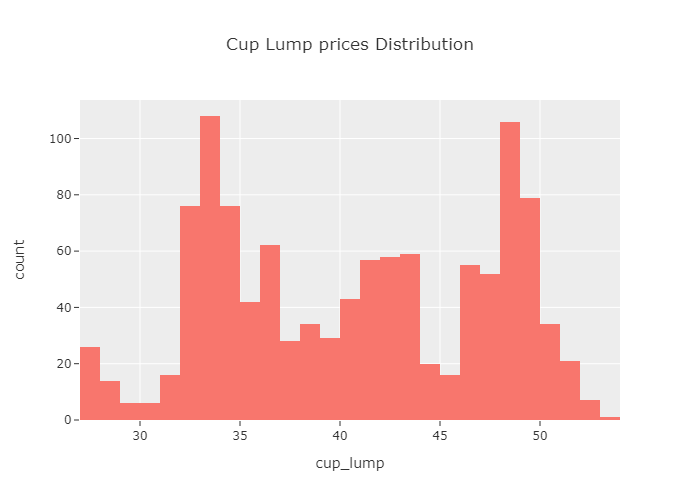

In [26]:
# plot distribution chart in cup lump column
px.histogram(rubber, x=rubber['cup_lump'], template='ggplot2', title='Cup Lump prices Distribution').show('png')

In [67]:
# calculate cup lump statistics
rubber['cup_lump'].describe()

count   1,131.00
mean       40.49
std         6.71
min        27.00
25%        34.20
50%        40.90
75%        47.00
max        53.30
Name: cup_lump, dtype: float64

In [68]:
# calculate cup lump median
rubber['cup_lump'].median()

40.9

In [69]:
# find mode in cup lump
rubber['cup_lump'].mode()

0   36.00
1   48.50
Name: cup_lump, dtype: float64

For Cup Lump it not fill missing values because the value start collected at year 2018 and I will decide to impute or remove it when modeling.

---

## Part 3: EDA

In [27]:
# average and median split by year
rubber.resample('y')['ribbed_smoked_sheet'].agg(['mean', 'median'])

,mean,median
date,,
2017-12-31,48.89,47.09
2018-12-31,45.81,46.03
2019-12-31,47.10,45.52
2020-12-31,49.43,44.36
2021-12-31,59.19,58.50
2022-12-31,60.76,61.07


In [28]:
# average and median split by quarter
rubber.resample('q')['ribbed_smoked_sheet'].agg(['mean', 'median'])

,mean,median
date,,
2017-09-30,53.80,53.49
2017-12-31,48.21,47.00
2018-03-31,47.82,48.00
2018-06-30,49.72,49.62
2018-09-30,44.25,44.60
2018-12-31,41.51,41.39
2019-03-31,47.96,46.72
2019-06-30,55.22,54.35
2019-09-30,44.92,42.39


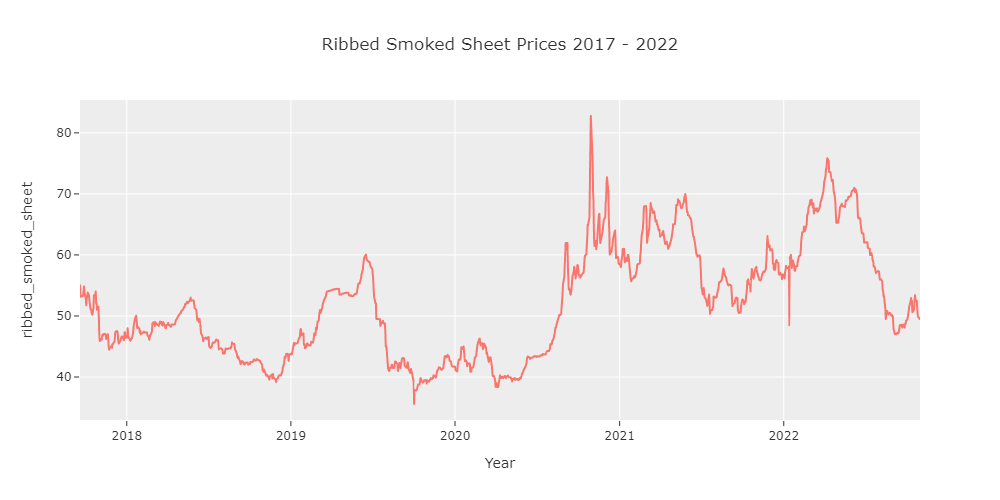

In [71]:
# plot ribbed_smoked_sheet price line chart
px.line(rubber, y="ribbed_smoked_sheet",title='Ribbed Smoked Sheet Prices 2017 - 2022',
        template='ggplot2', labels={'value':'Price', 'date':'Year'}, width=1000, height=500).show('png')

From chart above it roughly hard to try analyze the chart because price are swing and messy. So, I decide to do a rolling for 1 month for smooth line chart.

In [30]:
# create function for plot line chart with moving average data
def plot_line(li_cols, rolling, df, title=None):
    # need to drop na for make line connected
    fig = px.line(df.rolling(rolling).mean().dropna(subset=li_cols), y=li_cols,
        title=title,
        template='ggplot2', labels={'value':'Price', 'date':'Year', 'variable':'Rubber types'},
                 width=1000, height=500)
    fig.show('png')

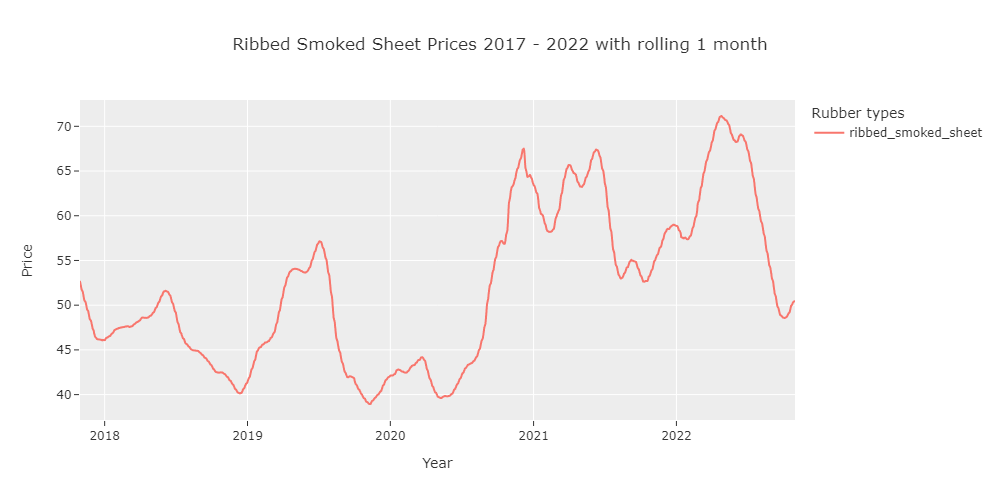

In [31]:
# plot ribbed_smoked_sheet price line chart
plot_line(['ribbed_smoked_sheet'], 30, rubber, 'Ribbed Smoked Sheet Prices 2017 - 2022 with rolling 1 month')

**Analysis**
- Ribbed smoke sheet prices have a chance to have seasonality
- Price will always rise up in middle of the year
- Price will always fall down in last of the year

### Rubber Types

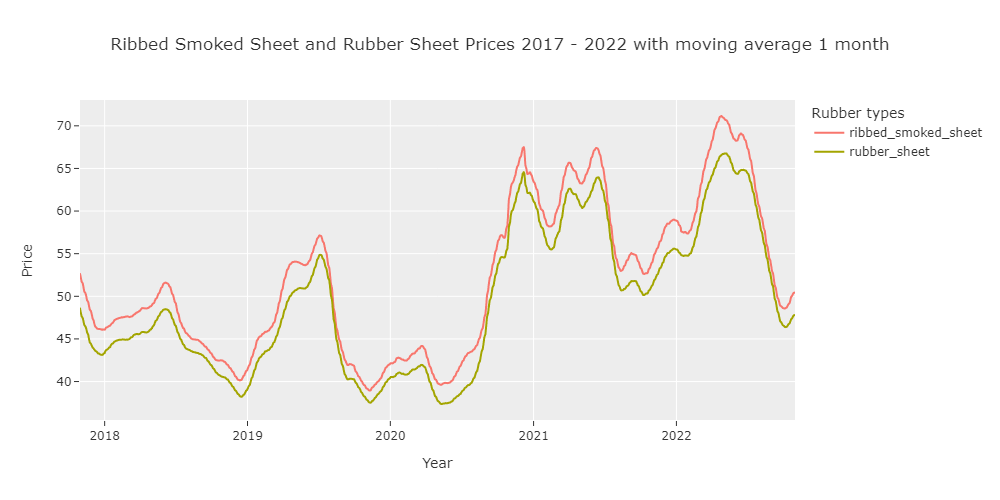

In [32]:
# plot ribbed_smoked_sheet and rubber_sheet price line chart
plot_line(['ribbed_smoked_sheet', 'rubber_sheet'], 30,
          rubber, title = 'Ribbed Smoked Sheet and Rubber Sheet Prices 2017 - 2022 with moving average 1 month')

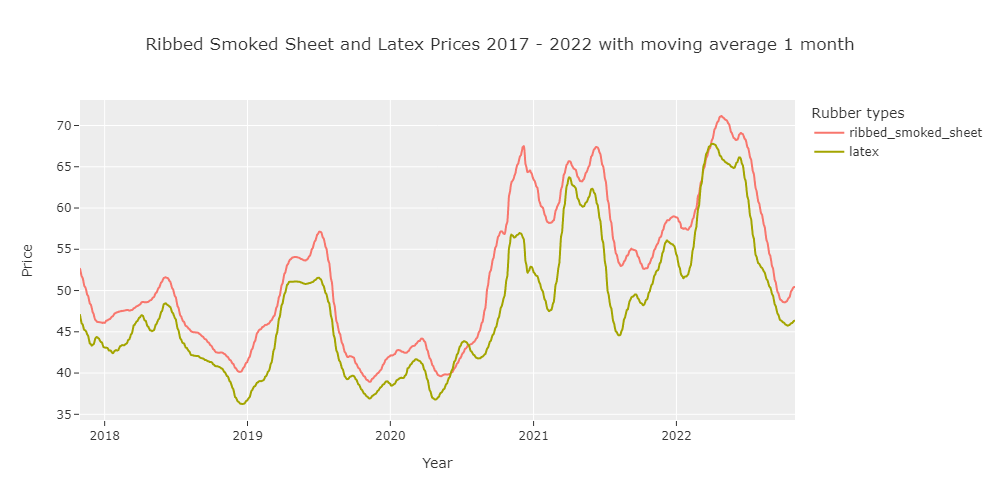

In [33]:
# plot ribbed_smoked_sheet and latex prices line chart
plot_line(['ribbed_smoked_sheet', 'latex'], 30,
          rubber, title = 'Ribbed Smoked Sheet and Latex Prices 2017 - 2022 with moving average 1 month')

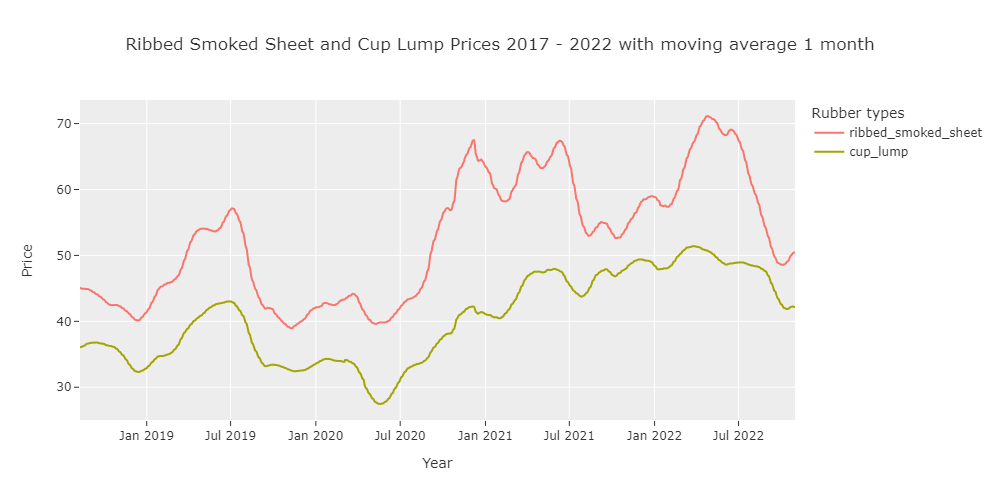

In [34]:
# plot ribbed_smoked_sheet and cup_lump prices line chart
plot_line(['ribbed_smoked_sheet', 'cup_lump'], 30,
          rubber, title = 'Ribbed Smoked Sheet and Cup Lump Prices 2017 - 2022 with moving average 1 month')

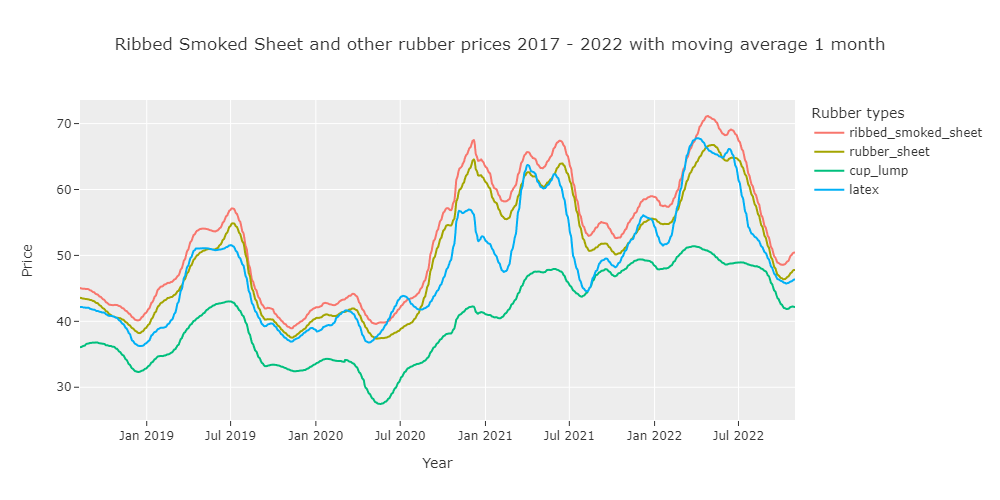

In [35]:
# plot ribbed_smoked_sheet and cup_lump prices line chart
plot_line(['ribbed_smoked_sheet', 'rubber_sheet', 'cup_lump', 'latex'], 30,
          rubber, title = 'Ribbed Smoked Sheet and other rubber prices\
 2017 - 2022 with moving average 1 month')

All rubber types prices are correlate to each other they rarely to had different trends.

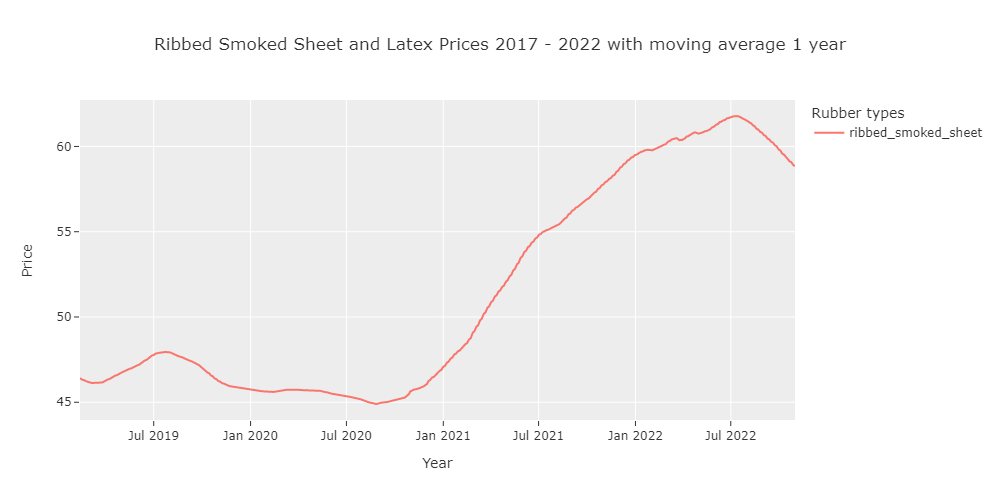

In [36]:
# plot ribbed_smoked_sheet and moving average for 1 year line chart
plot_line(['ribbed_smoked_sheet'], 365,
          rubber, title = 'Ribbed Smoked Sheet and Latex Prices 2017 - 2022 with moving average 1 year')

From chart above ribbed smoked sheet have trend price increase from year 2019 to year 2022

### Futures
For RSS prices compare to other features that is not THB currency we need to standardize to all prices for easily to compare.

In [37]:
# apply standardize function to df and store as new df
rubber_sc = rubber.apply(stats.zscore)
rubber_sc.head()

,cup_lump,rubber_sheet,ribbed_smoked_sheet,latex,fob,tocom,sicom,jpy,sgd,usd,crude_oil
date,,,,,,,,,,,
2017-09-19,NaN,0.36,0.34,0.44,0.27,0.21,-0.11,-0.83,0.84,-0.56,-0.46
2017-09-20,NaN,0.24,0.14,0.32,0.23,0.24,0.02,-0.71,0.82,-0.56,-0.46
2017-09-21,NaN,0.24,0.13,0.26,0.23,0.18,-0.07,-0.66,0.81,-0.56,-0.47
2017-09-22,NaN,0.27,0.15,0.26,0.12,0.16,-0.03,-0.75,0.86,-0.56,-0.47
2017-09-25,NaN,0.13,0.14,0.26,0.12,0.16,0.01,-0.82,0.78,-0.56,-0.49


#### Tocom

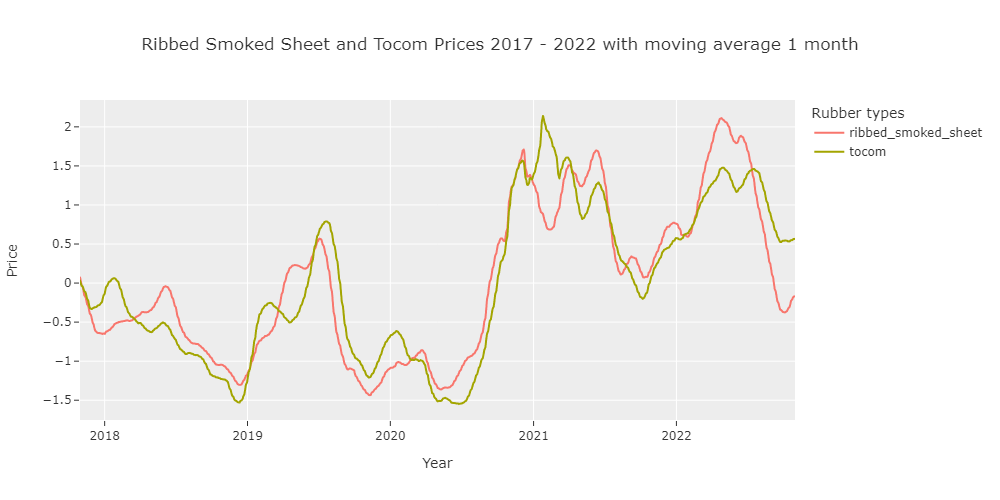

In [38]:
# plot ribbed_smoked_sheet and latex prices line chart
plot_line(['ribbed_smoked_sheet', 'tocom'], 30,
          rubber_sc, title = 'Ribbed Smoked Sheet and Tocom Prices 2017 - 2022 with moving average 1 month')

#### Sicom

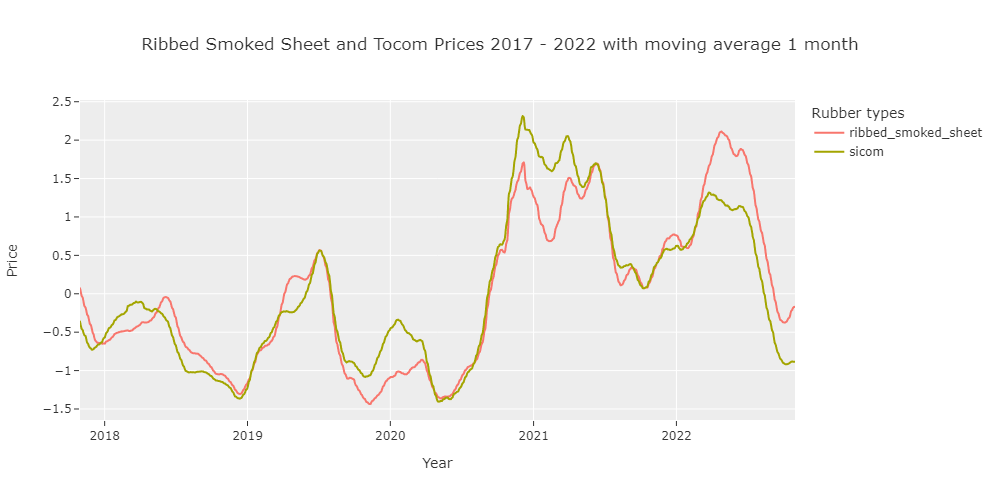

In [39]:
# plot ribbed_smoked_sheet and sicom prices line chart
plot_line(['ribbed_smoked_sheet', 'sicom'], 30,
          rubber_sc, title = 'Ribbed Smoked Sheet and Tocom Prices 2017 - 2022 with moving average 1 month')

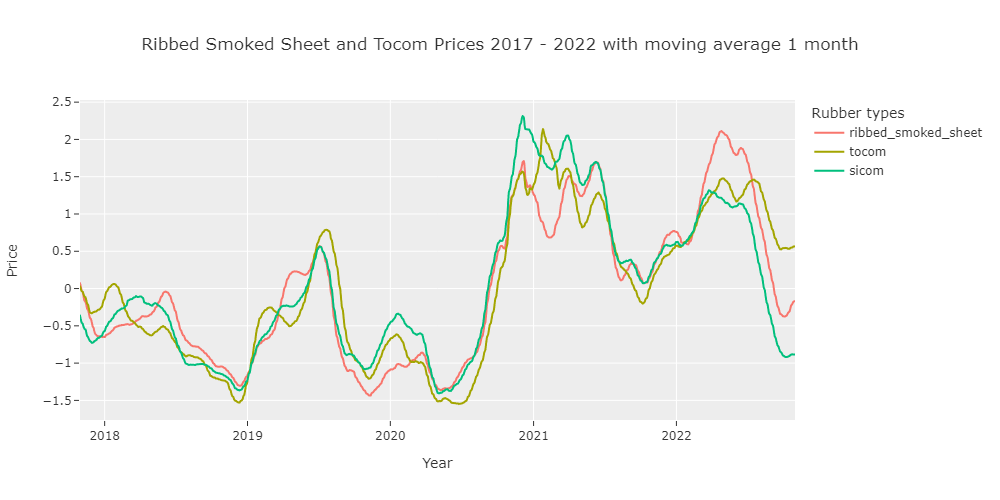

In [40]:
# plot ribbed_smoked_sheet and sicom prices line chart
plot_line(['ribbed_smoked_sheet', 'tocom', 'sicom'], 30,
          rubber_sc, title = 'Ribbed Smoked Sheet and Tocom Prices 2017 - 2022 with moving average 1 month')

### Currency

#### THB convert to JPY

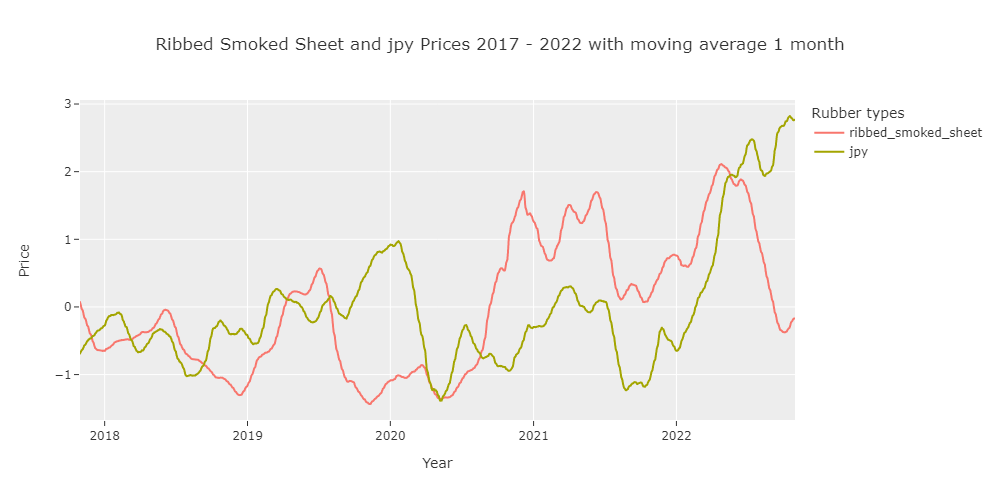

In [41]:
# plot ribbed_smoked_sheet and jpy prices line chart
plot_line(['ribbed_smoked_sheet', 'jpy'], 30,
          rubber_sc, title = 'Ribbed Smoked Sheet and jpy Prices 2017 - 2022 with moving average 1 month')

#### SGD Convert to THB

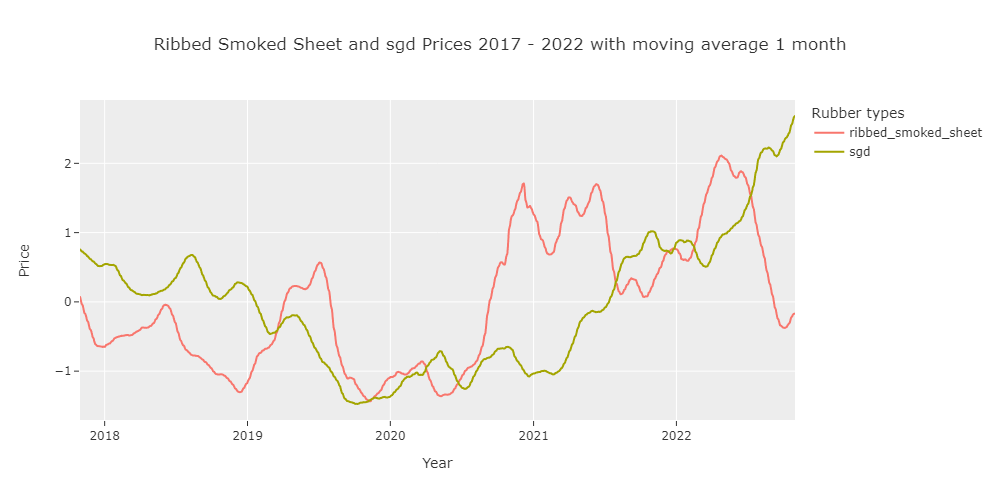

In [42]:
# plot ribbed_smoked_sheet and sgd prices line chart
plot_line(['ribbed_smoked_sheet', 'sgd'], 30,
          rubber_sc, title = 'Ribbed Smoked Sheet and sgd Prices 2017 - 2022 with moving average 1 month')

#### THB Convert to USD

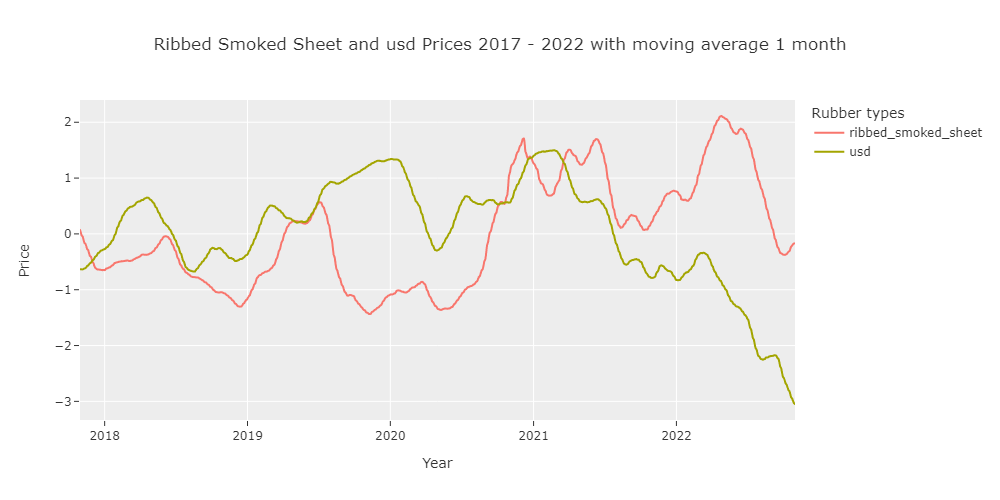

In [43]:
# plot ribbed_smoked_sheet and usd prices line chart
plot_line(['ribbed_smoked_sheet', 'usd'], 30,
          rubber_sc, title = 'Ribbed Smoked Sheet and usd Prices 2017 - 2022 with moving average 1 month')

USD prices are not quite showing the trend for rss price whihc I will drop it.

### Other commodity

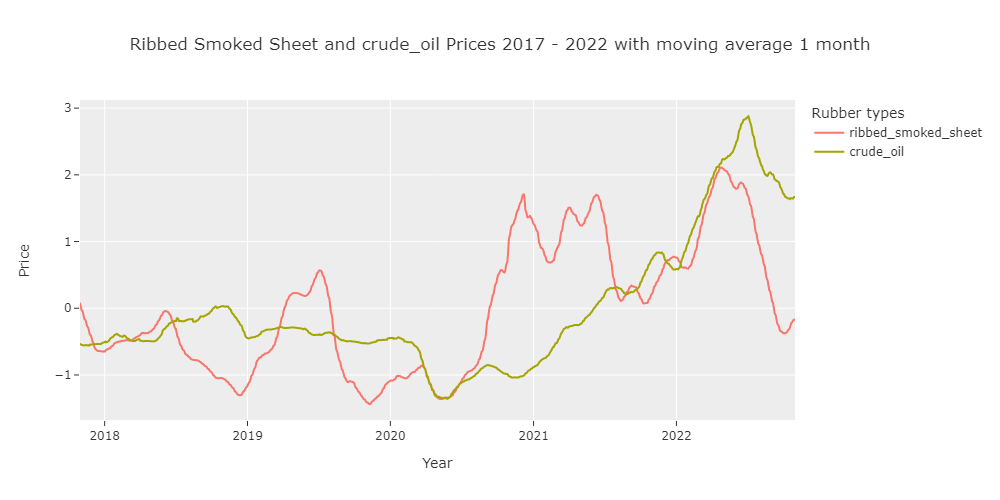

In [44]:
# plot ribbed_smoked_sheet and usd prices line chart
plot_line(['ribbed_smoked_sheet', 'crude_oil'], 30,
          rubber_sc, title = 'Ribbed Smoked Sheet and crude_oil Prices 2017 - 2022 with moving average 1 month')

For Crude oil it showing that they moderate association which if rss price are increase curde oil price sometimes also up as well.

### Correlation

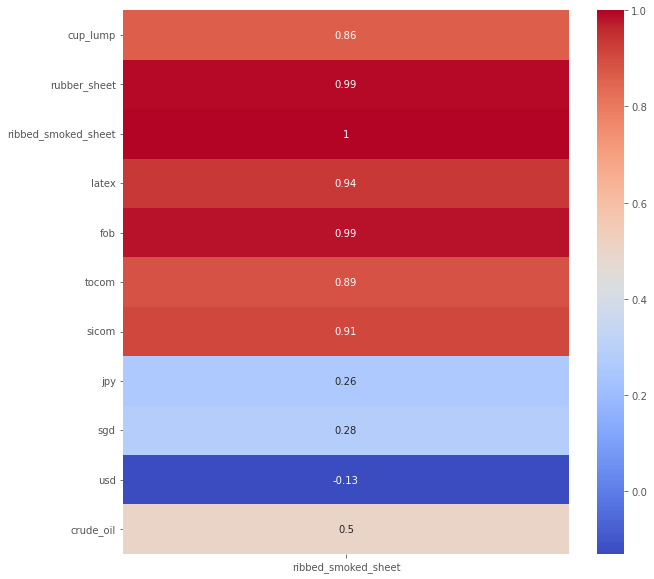

In [45]:
plt.figure(figsize=(10, 10))
sns.heatmap(rubber.corr()[['ribbed_smoked_sheet']], annot=True, cmap='coolwarm');

I decided to drop `usd` because it not meet at least moderate correlate.

In [46]:
# additional datetime columns: feature engineering
rubber_corr = rubber.copy()
rubber_corr["month"] = rubber_corr.index.month

rubber_corr["wday"] = rubber_corr.index.dayofweek
dict_days = {0:"1_Mon", 1:"2_Tue", 2:"3_Wed", 3:"4_Thu", 4:"5_Fri"}
rubber_corr["weekday"] = rubber_corr["wday"].apply(lambda x: dict_days[x])

rubber_corr["quarter"] = rubber_corr.index.quarter
rubber_corr["year"] = rubber_corr.index.year

rubber_corr.iloc[[0, -1]]

,cup_lump,rubber_sheet,ribbed_smoked_sheet,latex,fob,tocom,sicom,jpy,sgd,usd,crude_oil,month,wday,weekday,quarter,year
date,,,,,,,,,,,,,,,,
2017-09-19,NaN,52.56,55.04,51.50,60.10,208.80,174.30,3.37,24.56,0.03,51.77,9,1,2_Tue,3,2017
2022-10-31,40.75,47.03,49.47,47.00,58.15,215.70,149.90,3.91,26.87,0.03,86.53,10,0,1_Mon,4,2022


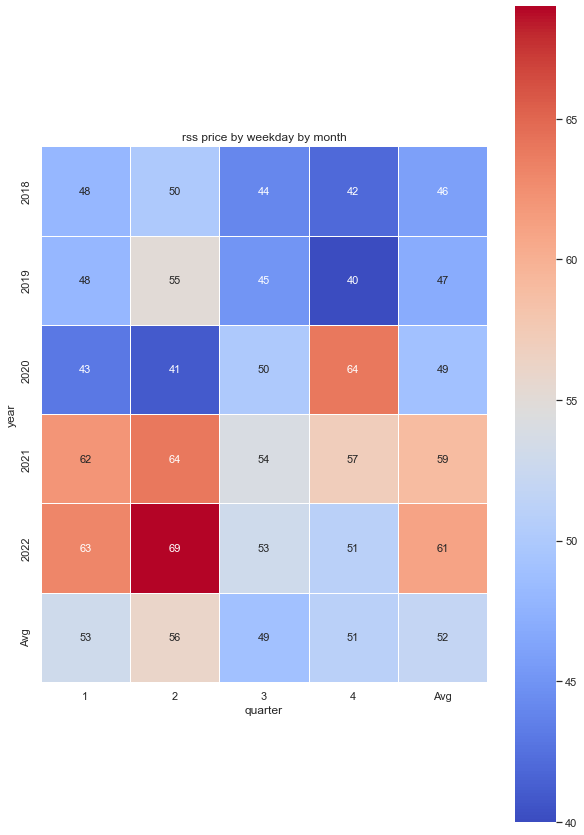

In [47]:
# pivot table: quarter in year
piv = pd.pivot_table(   rubber_corr.drop('cup_lump', axis=1).loc['2018':], 
                        values="ribbed_smoked_sheet", 
                        index="year", 
                        columns="quarter", 
                        aggfunc="mean", 
                        margins=True, margins_name="Avg", 
                        fill_value=0)

plt.figure(figsize = (10,15))
sns.set(font_scale=1)
sns.heatmap(piv.round(0), annot=True, square = True, \
            linewidths=.75, cmap="coolwarm", fmt = ".0f", annot_kws = {"size": 11})
plt.title("rss price by weekday by month")
plt.show()

Found that rss price will increase in quarter 1, 2. So, I decided to investigate further in each month.

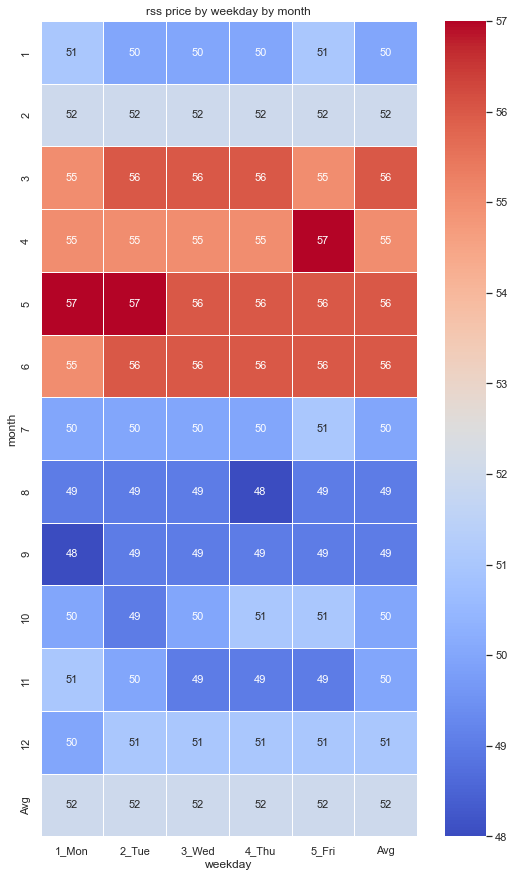

In [48]:
# pivot table: weekdays in months
piv = pd.pivot_table(   rubber_corr, 
                        values="ribbed_smoked_sheet", 
                        index="month", 
                        columns="weekday", 
                        aggfunc="mean", 
                        margins=True, margins_name="Avg", 
                        fill_value=0)

plt.figure(figsize = (10,15))
sns.set(font_scale=1)
sns.heatmap(piv.round(0), annot=True, square = True, \
            linewidths=.75, cmap="coolwarm", fmt = ".0f", annot_kws = {"size": 11})
plt.title("rss price by weekday by month")
plt.show()

The rss price will have higher price in month 3, 4, 5, 6.

### Seasonality

In [49]:
def create_corr_plot(series, title=None, plot_pacf=False):
    """
    take time series data and plot autocorrelation or partial autocorrelation
    source: https://community.plotly.com/t/plot-pacf-plot-acf-autocorrelation-plot-and-lag-plot/24108
    """
    corr_array = pacf(series.dropna(), alpha=0.05) if plot_pacf else acf(series.dropna(), alpha=0.05)
    lower_y = corr_array[1][:,0] - corr_array[0]
    upper_y = corr_array[1][:,1] - corr_array[0]

    fig = go.Figure()
    [fig.add_scatter(x=(x,x), y=(0,corr_array[0][x]), mode='lines',line_color='#3f3f3f') 
     for x in range(len(corr_array[0]))]
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=corr_array[0], mode='markers', marker_color='#1f77b4',
                   marker_size=12)
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=upper_y, mode='lines', line_color='rgba(255,255,255,0)')
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=lower_y, mode='lines', fillcolor='rgba(32, 146, 230,0.3)',
            fill='tonexty', line_color='rgba(255,255,255,0)')
    fig.update_traces(showlegend=False)
    fig.update_xaxes(range=[-1,42])
    fig.update_yaxes(zerolinecolor='#000000')
    
    title=f'{title} Partial Autocorrelation (PACF)' if plot_pacf else f'{title} Autocorrelation (ACF)'
    fig.update_layout(title=title)
    fig.show('png')

In [50]:
def plot_seasonal_decompose(result:DecomposeResult, dates:pd.Series=None, title:str="Seasonal Decomposition"):
    """
    take df that using seasonal decompose and return chart seasonal decompose in plotly form.
    source: https://gist.github.com/tomron/8798256fcee5438edd58c17654adf443
    """
    x_values = dates if dates is not None else np.arange(len(result.observed))
    return (
        make_subplots(
            rows=4,
            cols=1,
            subplot_titles=["Observed", "Trend", "Seasonal", "Residuals"],
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.observed, mode="lines", name='Observed'),
            row=1,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.trend, mode="lines", name='Trend'),
            row=2,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.seasonal, mode="lines", name='Seasonal'),
            row=3,
            col=1,
        )
        .add_trace(
            go.Scatter(x=x_values, y=result.resid, mode="lines", name='Residual'),
            row=4,
            col=1,
        )
        .update_layout(
            height=900, title=f'<b>{title}</b>', margin={'t':100}, title_x=0.5, showlegend=False
        )
        .show('png')
    )

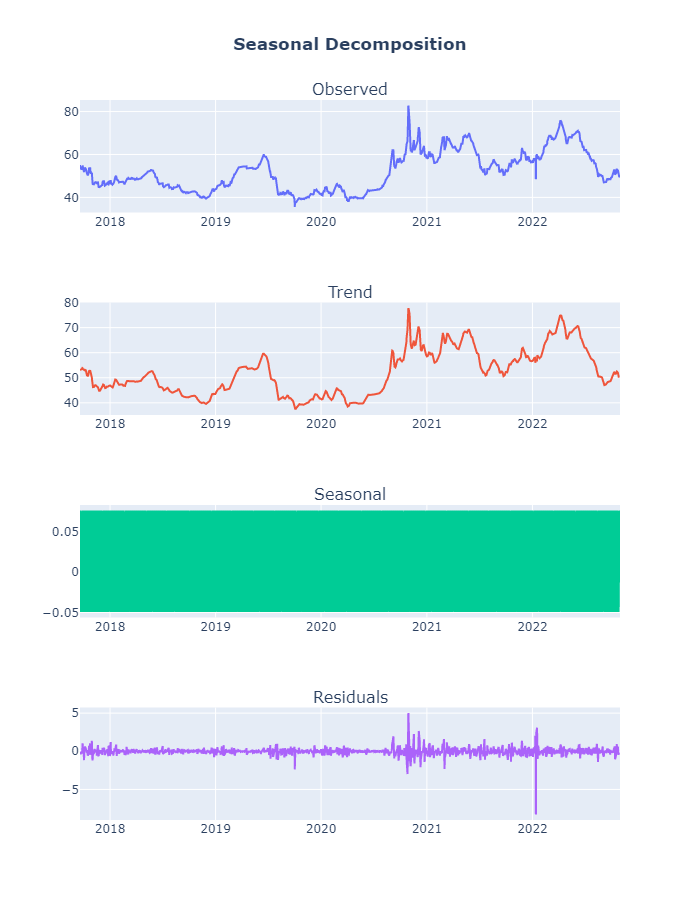

In [51]:
# decompose seasonality but for Business day frequenty 
# it too much in seasonal so I decided to more specific in 2022
decomposition = seasonal_decompose(rubber['ribbed_smoked_sheet'])
plot_seasonal_decompose(decomposition, dates=rubber.index)

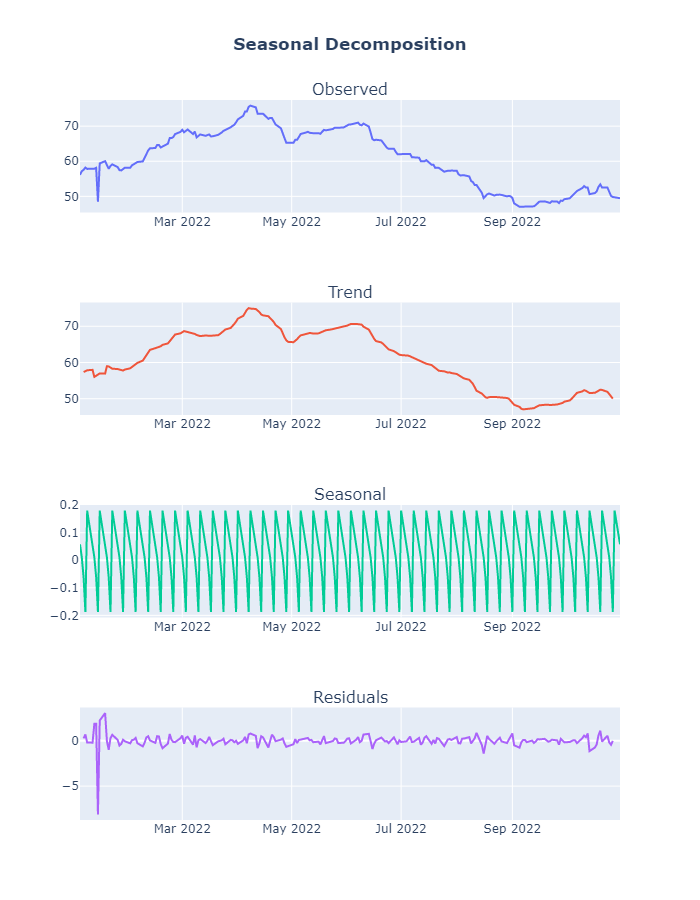

In [52]:
# decompose seasonality in 2022 for easily to interpret
decomposition = seasonal_decompose(rubber['ribbed_smoked_sheet'].loc['2022'])
plot_seasonal_decompose(decomposition, dates=rubber.loc['2022'].index)

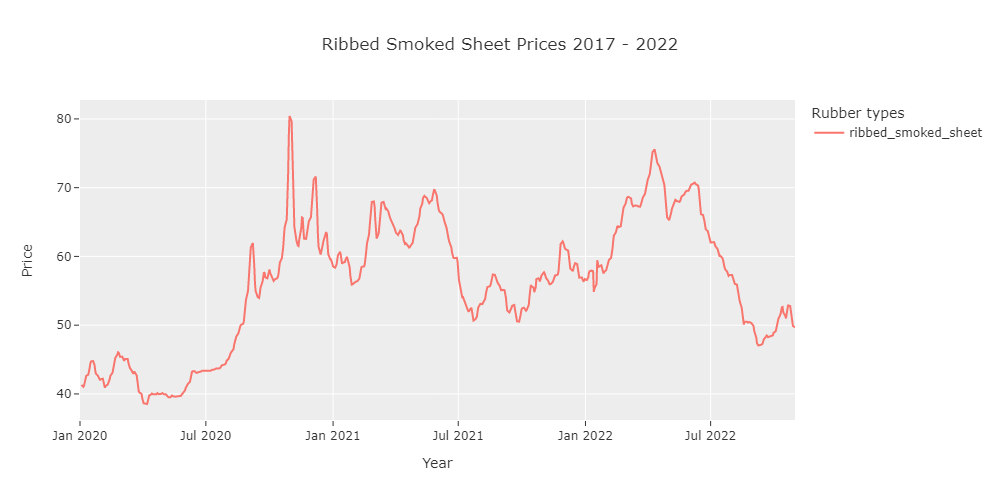

In [53]:
# plot ribbed_smoked_sheet price line chart
px.line(rubber.loc['2020':'2022'].rolling(3).mean(), y=["ribbed_smoked_sheet"],title='Ribbed Smoked Sheet Prices 2017 - 2022',
        template='ggplot2', labels={'value':'Price', 'date':'Year', 'variable':'Rubber types'},
       width=1000, height=500).show('png')

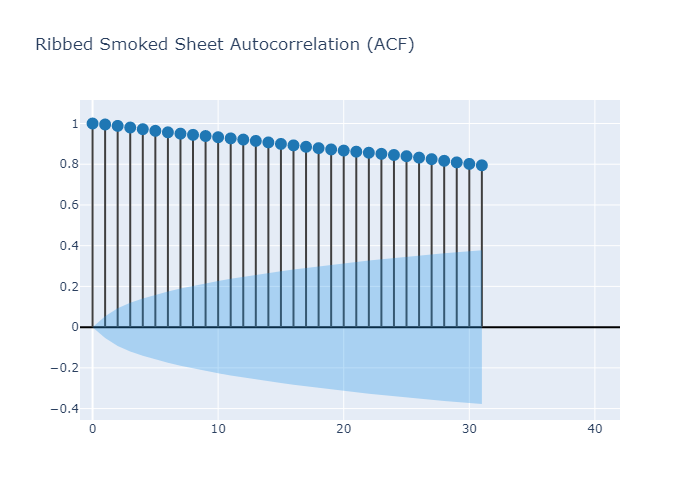

In [54]:
create_corr_plot(rubber['ribbed_smoked_sheet'], 'Ribbed Smoked Sheet')

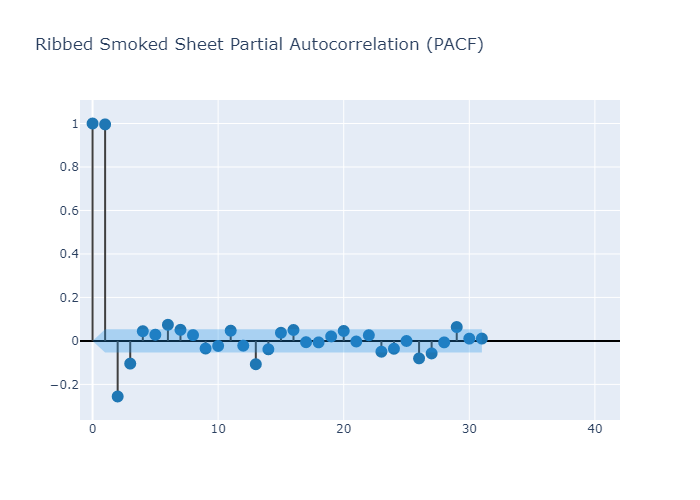

In [55]:
create_corr_plot(rubber['ribbed_smoked_sheet'], 'Ribbed Smoked Sheet', plot_pacf=True)

From partial autocorrelation and autocorrelation chart rss daily prices doesn't show the seasonality So for now I assume there are no seasonality.

### Stationary

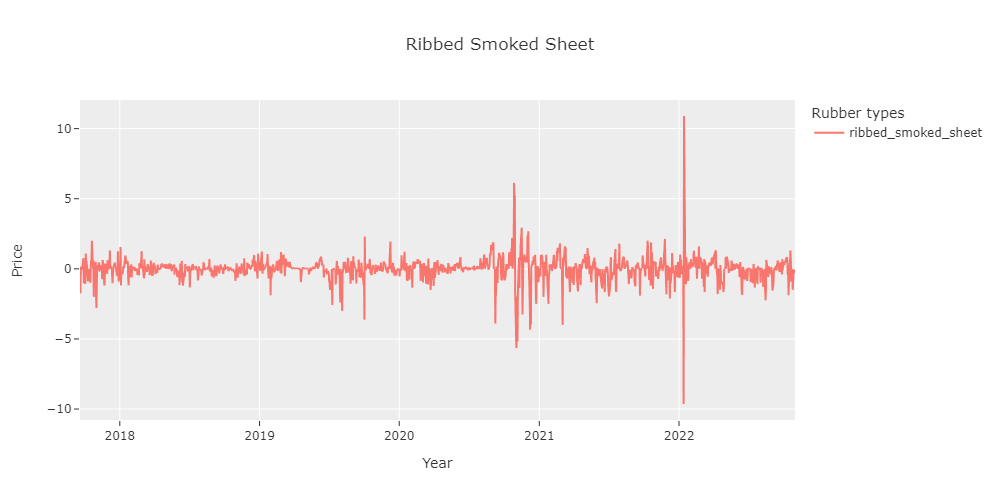

In [56]:
# plot ribbed_smoked_sheet price line chart
px.line(rubber.diff(), y=["ribbed_smoked_sheet"],title='Ribbed Smoked Sheet',
        template='ggplot2', labels={'value':'Price', 'date':'Year', 'variable':'Rubber types'},
       width=1000, height=500).show('png')

From chart above found that in 2022 they have price fluctuation which I will investigate that those values are outlier or not.

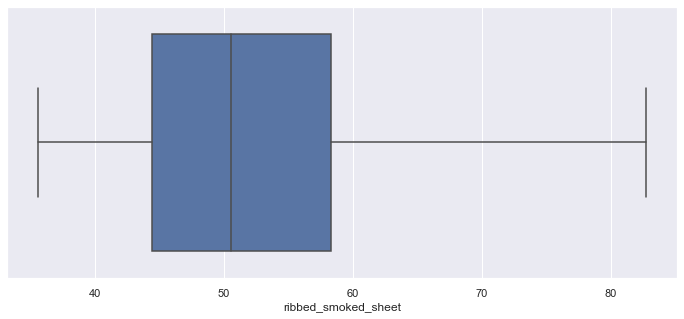

In [57]:
# find outliers with 3 IQR criteria
plt.figure(figsize=(12, 5))
sns.boxplot(x='ribbed_smoked_sheet', data=rubber, whis=3);

They are no outlier in 3 IQR criteria.

In [58]:
# use adfuller for test stationary in data
def interpret_dftest(df):
    """
    take df and will use adfuller test for check seasonality and print it
    """
    for col in df.columns:
        test = adfuller(df[col].diff().dropna())
        if test[1] > 0.05:
            print(f'{col} is not stationary')
        else: print(f'{col} is stationary')

In [59]:
# Run ADF test on the features in rubber df
interpret_dftest(rubber)

cup_lump is stationary
rubber_sheet is stationary
ribbed_smoked_sheet is stationary
latex is stationary
fob is stationary
tocom is stationary
sicom is stationary
jpy is stationary
sgd is stationary
usd is stationary
crude_oil is stationary


All features are stationary in different one time.

## Export DF
Export rubber dataframe for working in part modeling in part 4 [modeling](Modeling.ipynb)

In [60]:
# export rubber df for modeling part
rubber.to_csv('../data/rubber.csv')